In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
healthy = pd.read_csv("/data/healthy.csv", header=None)
healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Columns: 646 entries, 0 to 645
dtypes: float64(646)
memory usage: 2.8 MB


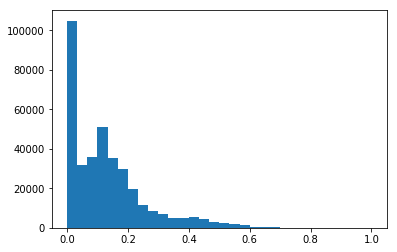

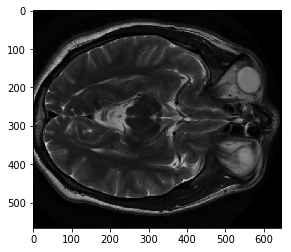

In [4]:
plt.imshow(healthy, cmap = "gray")

In [5]:
tumor = pd.read_csv("/data/tumor.csv", header=None)
tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Columns: 512 entries, 0 to 511
dtypes: float64(432), int64(80)
memory usage: 2.2 MB


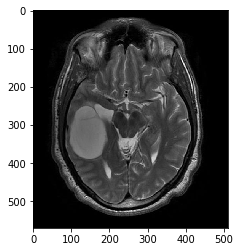

In [6]:
plt.imshow(tumor, cmap = "gray")

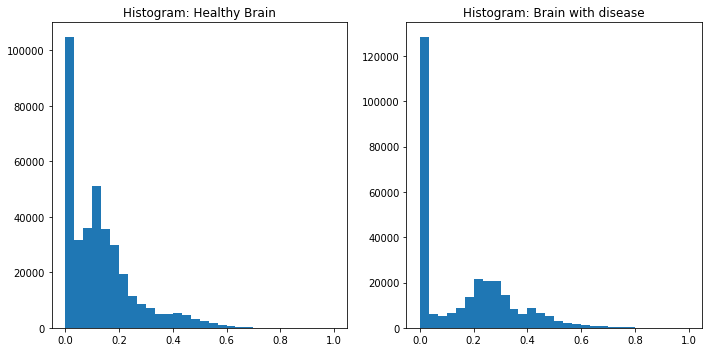

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(healthy.values.flatten(), bins = 30);
plt.title("Histogram: Healthy Brain")
plt.subplot(122)
plt.hist(tumor.values.flatten(), bins = 30);
plt.title("Histogram: Brain with disease")
plt.tight_layout()

             mean       pct
cluster                    
0        0.020708  0.373330
3        0.113364  0.309745
1        0.197404  0.189057
4        0.325727  0.076316
2        0.489015  0.051551
Inertia:  300.5942857100505
CPU times: user 9.36 s, sys: 280 ms, total: 9.64 s
Wall time: 1.9 s


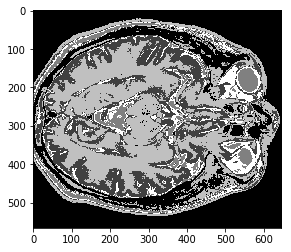

In [39]:
%%time

km1 = KMeans(n_clusters=5, n_init=10, init="k-means++")
X = healthy.values.reshape(-1, 1)
y = km1.fit_predict(X)

summary = pd.DataFrame(X)
summary["cluster"] = y
summary = summary.groupby("cluster")[0].agg(["mean", "count"])
summary["pct"] = summary["count"]/len(X)
summary.drop(columns=["count"], inplace=True)
print(summary.sort_values("mean"))


plt.imshow(y.reshape(566, 646), cmap = "gray")
print("Inertia: ", km1.inertia_)


Inertia:  294.27083020388034
             mean       pct
cluster                    
1        0.007081  0.476911
0        0.182392  0.175692
4        0.284297  0.210373
3        0.427691  0.106368
2        0.613217  0.030655
CPU times: user 9.07 s, sys: 260 ms, total: 9.33 s
Wall time: 1.57 s


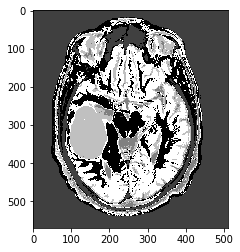

In [40]:
%%time

km2 = KMeans(n_clusters=5,n_init=10, init="k-means++")
X = tumor.values.reshape(-1, 1)
y = km2.fit_predict(X)
plt.imshow(y.reshape(tumor.shape[0], tumor.shape[1])
           , cmap = "gray", interpolation="nearest")
print("Inertia: ", km2.inertia_)

summary = pd.DataFrame(X)
summary["cluster"] = y
summary = summary.groupby("cluster")[0].agg(["mean", "count"])
summary["pct"] = summary["count"]/len(X)
summary.drop(columns=["count"], inplace=True)
print(summary.sort_values("mean"))
